In [ ]:
# !git clone https://github.com/Jsrsky/machine_unlearning_experiments

## Kaggle handler

In [ ]:
import os, sys
if 'kaggle' in os.getcwd():
    path = '/kaggle/working/machine_unlearning_experiments'
else:
    path = '..'

if path not in sys.path:
    sys.path.append(path)

## Dependecies

In [1]:
from torchvision import datasets

# Device configuration
from utils.utils import DEVICE

print(f"Device used: {DEVICE}")

ModuleNotFoundError: No module named 'utils'

## Utils

In [ ]:
# Set random seed for reproducibility
from utils.utils import set_seed
set_seed()

# Prepare Dataloaders
from methods.naive.naive_utils import init_dataloaders

# Train loop
from utils.train_test_metrics import train_model

# Plot losses
from utils.train_test_metrics import plot_training_history

# Test function
from utils.train_test_metrics import test_model

# Merics 
from utils.train_test_metrics import show_metrics

# Init model
from models.simple_cnn import init_model_cnn


## Parameters (arbitrary chosen)

In [ ]:
BATCH_SIZE = 32
LEARNING_RATE = 0.001
EPOCHS = 10

# Simple base training

## Init model

In [14]:
model, model_name, criterion, optimizer, transform = init_model_cnn()

Init model...
Done initializing model.
Model ID: 2532221070096, Optimizer ID: 2532241390048, Criterion ID: 2532240236928


## Init dataloaders

In [ ]:
dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
mnist_data_split_path = 'mnist_data_splits.json'

train_loader, val_loader, test_loader, classes = init_dataloaders(
    datasets=(dataset, test_dataset), 
    info_file_path = mnist_data_split_path, 
    val_ratio=0.2
    )

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 9727786.05it/s] 


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 273389.70it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1343717.85it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4553185.65it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Prepare DataLoaders...
Done preparing DataLoaders.


## Call train

In [16]:
train_model(model, model_name, train_loader, val_loader, criterion, optimizer, num_epochs=EPOCHS)

Training Epoch 1/10: 100%|██████████| 1500/1500 [00:52<00:00, 28.59it/s]


Epoch [1/10], Train Loss: 0.1485, Train Accuracy: 0.9549, Val Loss: 0.0590, Val Accuracy: 0.9822


Training Epoch 2/10: 100%|██████████| 1500/1500 [00:51<00:00, 29.32it/s]


Epoch [2/10], Train Loss: 0.0468, Train Accuracy: 0.9854, Val Loss: 0.0491, Val Accuracy: 0.9852


Training Epoch 3/10: 100%|██████████| 1500/1500 [00:57<00:00, 25.96it/s]


Epoch [3/10], Train Loss: 0.0316, Train Accuracy: 0.9904, Val Loss: 0.0375, Val Accuracy: 0.9888


Training Epoch 4/10: 100%|██████████| 1500/1500 [00:53<00:00, 27.86it/s]


Epoch [4/10], Train Loss: 0.0242, Train Accuracy: 0.9921, Val Loss: 0.0514, Val Accuracy: 0.9848


Training Epoch 5/10: 100%|██████████| 1500/1500 [00:59<00:00, 25.40it/s]


Epoch [5/10], Train Loss: 0.0185, Train Accuracy: 0.9939, Val Loss: 0.0379, Val Accuracy: 0.9893


Training Epoch 6/10: 100%|██████████| 1500/1500 [00:52<00:00, 28.56it/s]


Epoch [6/10], Train Loss: 0.0141, Train Accuracy: 0.9954, Val Loss: 0.0511, Val Accuracy: 0.9875


Training Epoch 7/10: 100%|██████████| 1500/1500 [00:58<00:00, 25.47it/s]


Epoch [7/10], Train Loss: 0.0113, Train Accuracy: 0.9963, Val Loss: 0.0424, Val Accuracy: 0.9882


Training Epoch 8/10: 100%|██████████| 1500/1500 [01:02<00:00, 23.88it/s]


Epoch [8/10], Train Loss: 0.0088, Train Accuracy: 0.9971, Val Loss: 0.0420, Val Accuracy: 0.9898


Training Epoch 9/10: 100%|██████████| 1500/1500 [00:58<00:00, 25.46it/s]


Epoch [9/10], Train Loss: 0.0080, Train Accuracy: 0.9972, Val Loss: 0.0502, Val Accuracy: 0.9890


Training Epoch 10/10: 100%|██████████| 1500/1500 [00:57<00:00, 26.05it/s]


Epoch [10/10], Train Loss: 0.0085, Train Accuracy: 0.9971, Val Loss: 0.0440, Val Accuracy: 0.9900
Training complete for CNN_MNIST. Training stats saved to 'CNN_MNIST_history.json'.


## Plot history losses

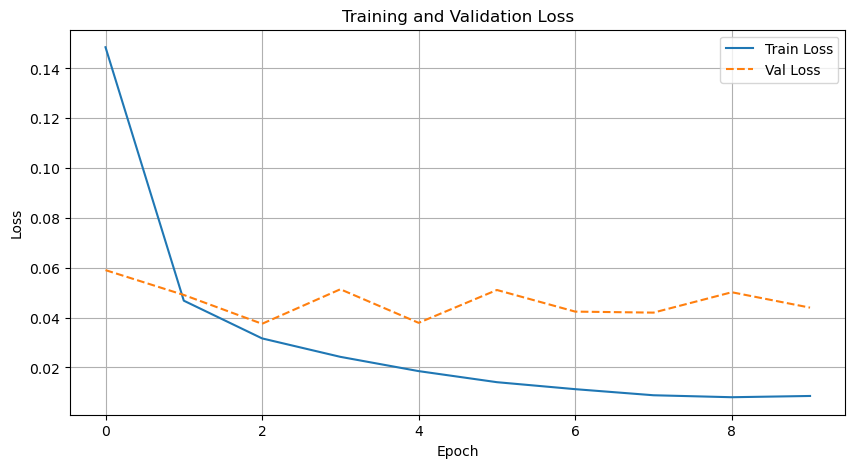

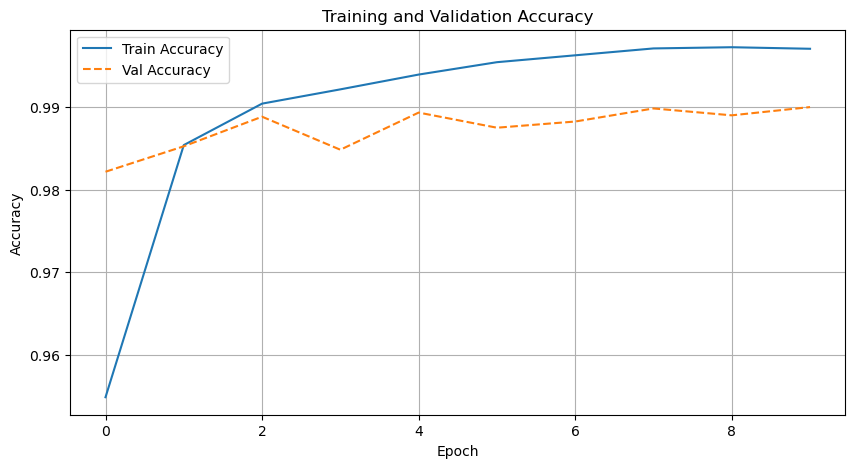

In [17]:
history_path = f'{model_name}_history.json'
plot_training_history(history_path)

## Call test

In [18]:
model_path = f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader)

Loading and testing model: CNN_MNIST


Evaluating Model: 100%|██████████| 313/313 [00:06<00:00, 51.93it/s]

Predictions and labels saved to CNN_MNIST_predictions.json


## Show metrics

Metrics for CNN_MNIST:
  - Test Accuracy: 0.9913
  - Precision: 0.9913
  - Recall: 0.9913
  - F1 Score: 0.9913


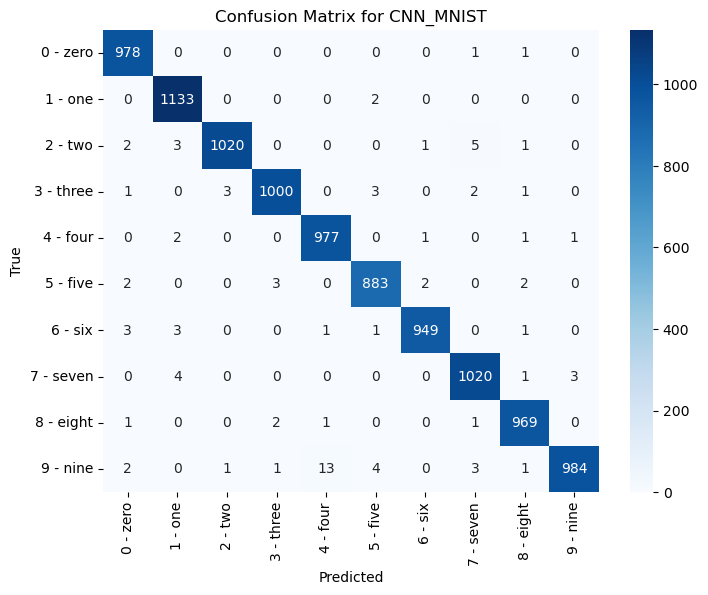

In [ ]:
predictions_path = f'{model_name}_predictions.json'
# classes = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
show_metrics(predictions_path, classes, model_name)

## Utils naive

In [ ]:
# Select samples to unlearn (10% random)
from utils.utils import select_samples_to_unlearn

# Update data splits
from methods.naive.naive_utils import update_splits_after_unlearning

# Recreate Dataloaders from json files
from methods.naive.naive_utils import recreate_dataloaders

# Naive unlearning

### Init new model

In [ ]:
data_splits_file = "mnist_data_splits.json"
unlearn_samples_file = "mnist_samples_to_unlearn.json"
updated_data_splits_path = "updated_mnist_data_splits.json"

In [ ]:
model, model_name, criterion, optimizer, transform = init_model_cnn()
model_name = "naive_unlearning_" + model_name

Init model...
Done initializing model.
Model ID: 134980435015040, Optimizer ID: 134980435012016, Criterion ID: 134980435012304
naive_unlearning_Simple_CNN_MNIST


### Init data

In [ ]:
dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
mnist_data_split_path = 'mnist_data_splits.json'

## Select samples to unlearn

In [ ]:
#ONLY ONCE
select_samples_to_unlearn(data_splits_file, unlearn_samples_file, unlearn_ratio=0.1)

Unlearn indices saved to mnist_samples_to_unlearn.json


## Update data splits -> delete samples

In [ ]:
update_splits_after_unlearning(data_splits_file, unlearn_samples_file, updated_data_splits_path)

Updated splits saved to mnist_updated_data_splits.json


## Recreate DataLoaders from json files

In [ ]:
train_loader, val_loader, test_loader, classes = recreate_dataloaders(dataset=dataset, batch_size=BATCH_SIZE)

Recreating DataLoaders...
Done recreating DataLoaders.


## Re-train

In [ ]:
train_model(model, model_name, train_loader, val_loader, criterion, optimizer, num_epochs=EPOCHS)

Training Epoch 1/10: 100%|██████████| 1500/1500 [00:14<00:00, 105.64it/s]


Epoch [1/10], Train Loss: 0.1442, Train Accuracy: 0.9555, Val Loss: 0.0598, Val Accuracy: 0.9824


Training Epoch 2/10: 100%|██████████| 1500/1500 [00:14<00:00, 106.59it/s]


Epoch [2/10], Train Loss: 0.0471, Train Accuracy: 0.9852, Val Loss: 0.0472, Val Accuracy: 0.9862


Training Epoch 3/10: 100%|██████████| 1500/1500 [00:14<00:00, 106.65it/s]


Epoch [3/10], Train Loss: 0.0304, Train Accuracy: 0.9907, Val Loss: 0.0437, Val Accuracy: 0.9872


Training Epoch 4/10: 100%|██████████| 1500/1500 [00:14<00:00, 106.45it/s]


Epoch [4/10], Train Loss: 0.0239, Train Accuracy: 0.9927, Val Loss: 0.0427, Val Accuracy: 0.9873


Training Epoch 5/10: 100%|██████████| 1500/1500 [00:14<00:00, 105.13it/s]


Epoch [5/10], Train Loss: 0.0167, Train Accuracy: 0.9944, Val Loss: 0.0372, Val Accuracy: 0.9894


Training Epoch 6/10: 100%|██████████| 1500/1500 [00:14<00:00, 105.22it/s]


Epoch [6/10], Train Loss: 0.0130, Train Accuracy: 0.9956, Val Loss: 0.0535, Val Accuracy: 0.9869


Training Epoch 7/10: 100%|██████████| 1500/1500 [00:14<00:00, 105.18it/s]


Epoch [7/10], Train Loss: 0.0127, Train Accuracy: 0.9957, Val Loss: 0.0613, Val Accuracy: 0.9859


Training Epoch 8/10: 100%|██████████| 1500/1500 [00:14<00:00, 106.83it/s]


Epoch [8/10], Train Loss: 0.0090, Train Accuracy: 0.9968, Val Loss: 0.0457, Val Accuracy: 0.9892


Training Epoch 9/10: 100%|██████████| 1500/1500 [00:14<00:00, 105.51it/s]


Epoch [9/10], Train Loss: 0.0089, Train Accuracy: 0.9969, Val Loss: 0.0541, Val Accuracy: 0.9884


Training Epoch 10/10: 100%|██████████| 1500/1500 [00:14<00:00, 106.56it/s]


Epoch [10/10], Train Loss: 0.0081, Train Accuracy: 0.9974, Val Loss: 0.0457, Val Accuracy: 0.9903
Training complete for naive_unlearning_Simple_CNN_MNIST. Training stats saved to 'naive_unlearning_Simple_CNN_MNIST_history.json'.


## Plot history losses

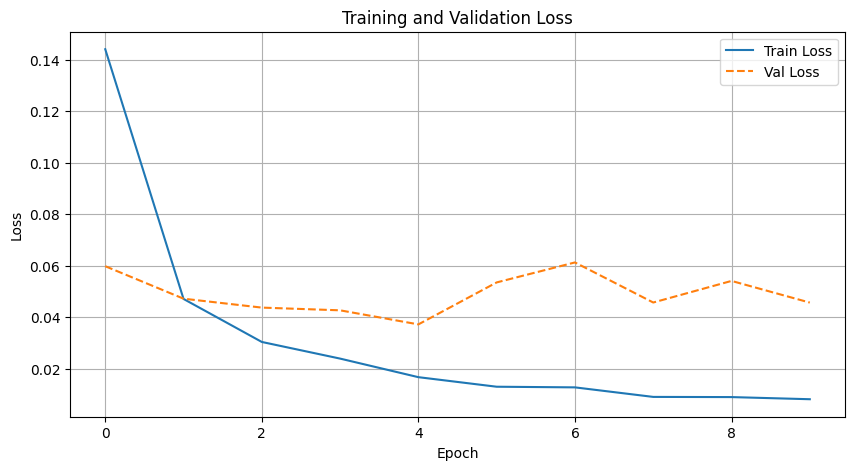

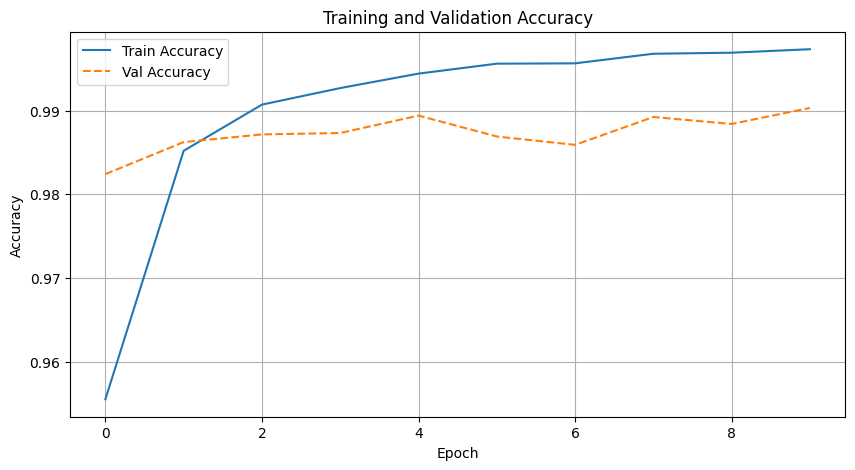

In [ ]:
history_path = f'{model_name}_history.json'
plot_training_history(history_path)

## Re-test

In [ ]:
pmodel_path = f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader)

Loading and testing model: naive_unlearning_Simple_CNN_MNIST


Evaluating Model: 100%|██████████| 313/313 [00:01<00:00, 159.58it/s]

Predictions and labels saved to naive_unlearning_Simple_CNN_MNIST_predictions.json


## Show metrics

Metrics for naive_unlearning_Simple_CNN_MNIST:
  - Test Accuracy: 0.9972
  - Precision: 0.9972
  - Recall: 0.9972
  - F1 Score: 0.9972


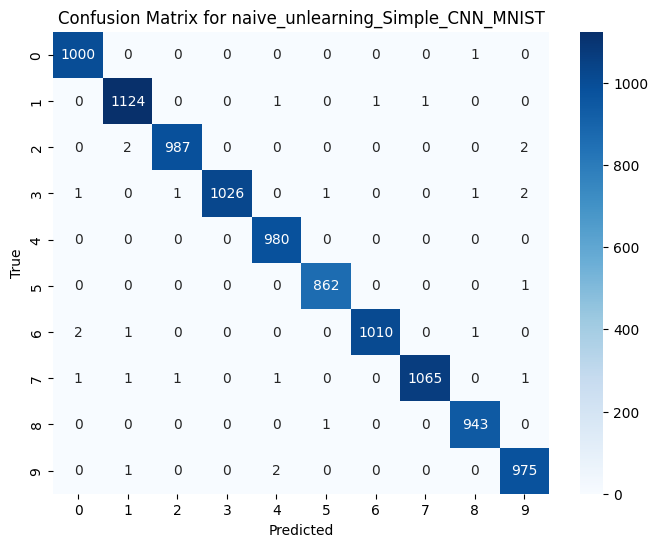

In [ ]:
predictions_path = f'{model_name}_predictions.json'
# classes = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
show_metrics(predictions_path, classes, model_name)